In [1]:
# from pymongo import MongoClient
# from pprint import pprint
# client= MongoClient()
# db=client.amzelec
# amzelecmeta=db.amzelecmeta
# amzelecreview=db.amzelecreview
# # amzbaby.drop()S
# # for review in reviews:
# #     hmm.save(review)####save each document into hmm collection
# # cursor = hmm.find()####finds everything in the document

In [2]:
# import json
# import gzip
# import pprint as pprint
# def parse(path):
#   g = gzip.open(path, 'r')
#   for l in g:
#     yield json.dumps(eval(l))

# cnt=0
# for l in parse("meta_Electronics.json.gz"):

#     amzelecmeta.save(json.loads(l))
#     cnt=cnt+1
#     if cnt%1000 == 0:
#         print cnt

# # pprint.pprint(o) 

In [3]:
# cnt=0
# for l in parse("reviews_Electronics.json.gz"):

#     amzelecreview.save(json.loads(l))
#     cnt=cnt+1
#     if cnt%1000 == 0:
#         print cnt

In [4]:
# f = open("output.strict2", 'w')
# cnt=0
# for l in parse("reviews_Baby.json.gz"):
# #     print l
#     f.write(l + '\n')
#     cnt=cnt+1
#     if cnt>3:
#         break
# o = json.loads(l)  
# pprint.pprint(o) 

In [5]:
# print amzbaby.count()
# amzbaby.drop()

In [6]:
# import pprint
# pprint.pprint(amzelecmeta.find_one())


In [7]:
# pprint.pprint(amzelecreview.find_one())

In [8]:
# amzbabyreview.drop()
# amzbabymeta.drop()

# print amzbabymeta.count()
# print amzbabyreview.count()

In [9]:
####we run it only once
# import graphlab as gl
# import os
# data = gl.SFrame.read_csv("reviews_Electronics.json.gz", header=False)
# data.save('./elec_rev_data_new')
#data.head()

In [1]:
## ###we run it only once--especially this one
## import graphlab as gl
## (sf,badlines)= gl.SFrame.read_csv_with_errors("meta_Electronics.json.gz",column_type_hints=dict,header=False)
## # data2 = gl.SFrame.read_csv("meta_Electronics.json.gz",column_type_hints=dict,header=False)
## # data=datatuple[1]
## sf.save('./elec_meta_data_new')
import graphlab as gl
gl.set_runtime_config('GRAPHLAB_SFRAME_GROUPBY_BUFFER_NUM_ROWS', 10000000)

[INFO] This trial license of GraphLab Create is assigned to revanthg@hotmail.com and will expire on July 10, 2015. Please contact trial@dato.com for licensing options or to request a free non-commercial license for personal or academic use.

[INFO] Start server at: ipc:///tmp/graphlab_server-404 - Server binary: /Users/revanthgarlapati/anaconda/lib/python2.7/site-packages/graphlab/unity_server - Server log: /tmp/graphlab_server_1434031152.log
[INFO] GraphLab Server Version: 1.4.0


In [2]:
elec_rev_data = gl.load_sframe('./elec_rev_data_new')
elec_meta_data = gl.load_sframe('./elec_meta_data_new')
# data.unpack
# data.unpack

In [4]:
# elec_rev_data.head()


In [6]:
# elec_meta_data.head()

In [5]:
elec_meta_data = elec_meta_data.unpack('X1', column_name_prefix='')
elec_meta_data.head()


asin,brand,categories,imUrl,price
0132793040,None,"[[Electronics, Computers& Accessories, Cables & ...",http://ecx.images-amazon.com/images/I/31JIPhp% ...,None
0321732944,None,"[[Electronics, Computers& Accessories, Cables & ...",http://ecx.images-amazon.com/images/I/31uogm6Y ...,None
0439886341,None,"[[Electronics, Computers& Accessories, PDAs, ...",http://ecx.images-amazon.com/images/I/51k0qa8f ...,8.15
0511189877,None,"[[Electronics,Accessories & Supplies, ...",http://ecx.images-amazon.com/images/I/41HaAhbv ...,23.36
0528881469,None,"[[Electronics, GPS &Navigation, Vehicle GPS, ...",http://ecx.images-amazon.com/images/I/51FnRkJq ...,299.99
0558835155,None,"[[Electronics,Accessories & Supplies, ...",http://ecx.images-amazon.com/images/I/21rEirnd ...,13.95
0594012015,Barnes &amp; Noble,"[[Electronics, eBookReaders & Accessories, ...",http://ecx.images-amazon.com/images/I/41kQsHT8 ...,32.1
0594017580,None,"[[Electronics, eBookReaders & Accessories, ...",http://ecx.images-amazon.com/images/I/41CqeMM0 ...,78.83
0594450209,None,"[[Electronics, eBookReaders & Accessories, ...",http://ecx.images-amazon.com/images/I/31KkpByX ...,15.55
0594287995,None,"[[Electronics, eBookReaders & Accessories, ...",http://g-ecx.images-amazon.com/images/G/01/x-s ...,None


In [6]:
##takes more than a minute
elec_rev_data = elec_rev_data.unpack('X1', column_name_prefix='')
elec_rev_data.head()


asin,helpful,overall,reviewText,reviewTime,reviewerID,reviewerName
0132793040,"[1, 1]",5.0,Corey Barker does a greatjob of explaining Blend ...,"04 13, 2013",AKM1MP6P0OYPR,"Vicki Gibson ""momo4"""
0321732944,"[0, 0]",5.0,While many beginner DVDstry to teach you ...,"07 1, 2012",A2CX7LUOHB2NDG,Bernie
0439886341,"[1, 1]",1.0,It never worked. Mydaughter worked to earn ...,"04 29, 2013",A2NWSAGRHCP8N5,bowmans2007
0439886341,"[1, 1]",3.0,Some of the functions didnot work properly. My ...,"07 22, 2013",A2WNBOD3WNDNKT,JAL
0439886341,"[4, 4]",1.0,Do not waste your moneyon this thing it is ...,"04 18, 2012",A1GI0U4ZRJA8WN,Truthfull
0511189877,"[0, 0]",5.0,Dog got the old remoteand destroyed it. Di ...,"04 14, 2014",A1QGNMC6O1VW39,CK
0511189877,"[1, 1]",2.0,"This remote, for whateverreason, was chosen by ...","04 14, 2014",A3J3BRHTDRFJ2G,"EJ Honda ""ejhonda"""
0511189877,"[0, 1]",5.0,We had an old Time WarnerCable remote that was ...,"03 27, 2014",A2TY0BTJOTENPG,Johnny Exx
0511189877,"[0, 0]",5.0,This unit works just likethe TEC unit only bet ...,"03 23, 2014",A34ATBPOK6HCHY,Nancy C. Johnson
0511189877,"[0, 0]",5.0,It is an exact duplicateof my Time warner ...,"03 22, 2014",A89DO69P0XZ27,Stephen Schultz


In [7]:
elec_rev_data_revtext=elec_rev_data['reviewText']

elec_rev_data_revtext.head()

# elec_rev_data_revtext_small=elec_rev_data_revtext[0:1000]

# elec_rev_data_revtext_list=list(elec_rev_data_revtext)
# elec_rev_data_revtext[0]

# elec_rev_data.column_names()
# appending the first review that would be overwritten by new column name "X1" later
# temp3=gl.SFrame([elec_rev_data[0]])
# type(temp3)
# type(elec_rev_data)

# import graphlab as gl
# docs = gl.SArray('http://s3.amazonaws.com/dato-datasets/nips-text')
# m1 = gl.topic_model.create(docs, num_topics=30, num_iterations=50, verbose=False, print_interval=0)

dtype: str
Rows: 10
['Corey Barker does a great job of explaining Blend Modes in this DVD. All of the Kelby training videos are great but pricey to buy individually. If you really want bang for your buck just subscribe to Kelby Training online.', "While many beginner DVDs try to teach you everything there is to know about Photoshop CS5, this introductory course shows you the critical things you need to know to start feeling confident in your Photoshop skills. Bestselling author and Photoshop trainer, Matt Kloskowski shows you exactly what you need to know about tools, filters, adjustments, palettes, and menu items to hit the ground running in Photoshop. These include: layers and how they're key to mastering Photoshop, selections and the essential tools you really need to worry about, getting started with Camera Raw and which Retouching tools you'll find the most helpful. When you're done with this DVD you'll have a solid grasp of the most important features and be at the next level in 

In [8]:
#creation of bag of words is almost instantaneous
bow = gl.text_analytics.count_words(elec_rev_data['reviewText'])
#adding a column that contains BOW of each review
elec_rev_data['bow'] = bow
# bow.dict_has_any_keys(['gold'])
# elec_rev_data.column_names
#printing one element took 5 minutes
# bow[0]
# sa = gl.SArray([1,2,3,4,5])
# x=[len(i.split()) for i in elec_rev_data_revtext]
# print x[0:100]
# sa = gl.SArray([1,2,3,4,5])
# sa[sa.apply(lambda x: x <= 1)]
# elec_rev_data.append(gl.SFrame(list(elec_rev_data[0]))# temp3
# # elec_rev_data.append((temp3))

In [9]:
%%time
elec_rev_data.column_names
# elec_meta_data.column_names

# elec_rev_data.unpack
# elec_rev_data.column_names()[0]

CPU times: user 4 µs, sys: 1e+03 ns, total: 5 µs
Wall time: 8.11 µs


<bound method SFrame.column_names of Columns:
	asin	str
	helpful	list
	overall	float
	reviewText	str
	reviewTime	str
	reviewerID	str
	reviewerName	str
	summary	str
	unixReviewTime	int
	bow	dict

Rows: 7834166

Data:
+------------+---------+---------+-------------------------------+-------------+
|    asin    | helpful | overall |           reviewText          |  reviewTime |
+------------+---------+---------+-------------------------------+-------------+
| 0132793040 |  [1, 1] |   5.0   | Corey Barker does a great ... | 04 13, 2013 |
| 0321732944 |  [0, 0] |   5.0   | While many beginner DVDs t... |  07 1, 2012 |
| 0439886341 |  [1, 1] |   1.0   | It never worked. My daught... | 04 29, 2013 |
| 0439886341 |  [1, 1] |   3.0   | Some of the functions did ... | 07 22, 2013 |
| 0439886341 |  [4, 4] |   1.0   | Do not waste your money on... | 04 18, 2012 |
| 0511189877 |  [0, 0] |   5.0   | Dog got the old remote and... | 04 14, 2014 |
| 0511189877 |  [1, 1] |   2.0   | This remote, for wha

In [7]:
tempframe=elec_rev_data.head()
# elec_rev_data.save('./elec_rev_data_bow_new')
tempframe

asin,helpful,overall,reviewText,reviewTime,reviewerID,reviewerName
0132793040,"[1, 1]",5.0,Corey Barker does a greatjob of explaining Blend ...,"04 13, 2013",AKM1MP6P0OYPR,"Vicki Gibson ""momo4"""
0321732944,"[0, 0]",5.0,While many beginner DVDstry to teach you ...,"07 1, 2012",A2CX7LUOHB2NDG,Bernie
0439886341,"[1, 1]",1.0,It never worked. Mydaughter worked to earn ...,"04 29, 2013",A2NWSAGRHCP8N5,bowmans2007
0439886341,"[1, 1]",3.0,Some of the functions didnot work properly. My ...,"07 22, 2013",A2WNBOD3WNDNKT,JAL
0439886341,"[4, 4]",1.0,Do not waste your moneyon this thing it is ...,"04 18, 2012",A1GI0U4ZRJA8WN,Truthfull
0511189877,"[0, 0]",5.0,Dog got the old remoteand destroyed it. Di ...,"04 14, 2014",A1QGNMC6O1VW39,CK
0511189877,"[1, 1]",2.0,"This remote, for whateverreason, was chosen by ...","04 14, 2014",A3J3BRHTDRFJ2G,"EJ Honda ""ejhonda"""
0511189877,"[0, 1]",5.0,We had an old Time WarnerCable remote that was ...,"03 27, 2014",A2TY0BTJOTENPG,Johnny Exx
0511189877,"[0, 0]",5.0,This unit works just likethe TEC unit only bet ...,"03 23, 2014",A34ATBPOK6HCHY,Nancy C. Johnson
0511189877,"[0, 0]",5.0,It is an exact duplicateof my Time warner ...,"03 22, 2014",A89DO69P0XZ27,Stephen Schultz


In [8]:
tempframemeta=elec_meta_data.head()
tempframemeta
# sf['tfidf'] = graphlab.text_analytics.tf_idf(sf['bow'])


# temp_pd= gl.SFrame.to_dataframe(tempframe)

# tempframe['tfidf'] = gl.text_analytics.tf_idf(temp_pd) # elec_rev_data.rename({elec_rev_data.column_names()[0]: 'X1'})

asin,brand,categories,imUrl,price
0132793040,None,"[[Electronics, Computers& Accessories, Cables & ...",http://ecx.images-amazon.com/images/I/31JIPhp% ...,None
0321732944,None,"[[Electronics, Computers& Accessories, Cables & ...",http://ecx.images-amazon.com/images/I/31uogm6Y ...,None
0439886341,None,"[[Electronics, Computers& Accessories, PDAs, ...",http://ecx.images-amazon.com/images/I/51k0qa8f ...,8.15
0511189877,None,"[[Electronics,Accessories & Supplies, ...",http://ecx.images-amazon.com/images/I/41HaAhbv ...,23.36
0528881469,None,"[[Electronics, GPS &Navigation, Vehicle GPS, ...",http://ecx.images-amazon.com/images/I/51FnRkJq ...,299.99
0558835155,None,"[[Electronics,Accessories & Supplies, ...",http://ecx.images-amazon.com/images/I/21rEirnd ...,13.95
0594012015,Barnes &amp; Noble,"[[Electronics, eBookReaders & Accessories, ...",http://ecx.images-amazon.com/images/I/41kQsHT8 ...,32.1
0594017580,None,"[[Electronics, eBookReaders & Accessories, ...",http://ecx.images-amazon.com/images/I/41CqeMM0 ...,78.83
0594450209,None,"[[Electronics, eBookReaders & Accessories, ...",http://ecx.images-amazon.com/images/I/31KkpByX ...,15.55
0594287995,None,"[[Electronics, eBookReaders & Accessories, ...",http://g-ecx.images-amazon.com/images/G/01/x-s ...,None


In [9]:
print tempframe['asin']
# tempframe.join(tempframemeta, how='left')
# print type(tempframe['bow'])
# print type(tempframe['bow'][0])
# print type(temp_pd['bow'])
# print type(temp_pd['bow'][0])
# type(elec_rev_data['bow'])

# docs = sf['bow'].dict_trim_by_values(2)##remove all words do not occur at least twice in each document

#takes a minute
# elec_rev_data = elec_rev_data.unpack('X1', column_name_prefix='')

['0132793040', '0321732944', '0439886341', '0439886341', '0439886341', '0511189877', '0511189877', '0511189877', '0511189877', '0511189877']


In [10]:
print tempframemeta['asin']
# tempframe['tfidf'] = gl.text_analytics.tf_idf(tempframe['bow']) # elec_rev_data.rename({elec_rev_data.column_names()[0]: 'X1'})
# elec_rev_data.head()

['0132793040', '0321732944', '0439886341', '0511189877', '0528881469', '0558835155', '0594012015', '0594017580', '0594450209', '0594287995']


In [11]:
# gl.text_analytics.tf_idf(tempframe['bow'][0])
# gl.text_analytics.tf_idf(gl.SArray([{'cow': 1}]))
tempframe['tfidf'] = gl.text_analytics.tf_idf(tempframe['bow'])['docs']

In [12]:
tempframe

asin,helpful,overall,reviewText,reviewTime,reviewerID,reviewerName
0132793040,"[1, 1]",5.0,Corey Barker does a greatjob of explaining Blend ...,"04 13, 2013",AKM1MP6P0OYPR,"Vicki Gibson ""momo4"""
0321732944,"[0, 0]",5.0,While many beginner DVDstry to teach you ...,"07 1, 2012",A2CX7LUOHB2NDG,Bernie
0439886341,"[1, 1]",1.0,It never worked. Mydaughter worked to earn ...,"04 29, 2013",A2NWSAGRHCP8N5,bowmans2007
0439886341,"[1, 1]",3.0,Some of the functions didnot work properly. My ...,"07 22, 2013",A2WNBOD3WNDNKT,JAL
0439886341,"[4, 4]",1.0,Do not waste your moneyon this thing it is ...,"04 18, 2012",A1GI0U4ZRJA8WN,Truthfull
0511189877,"[0, 0]",5.0,Dog got the old remoteand destroyed it. Di ...,"04 14, 2014",A1QGNMC6O1VW39,CK
0511189877,"[1, 1]",2.0,"This remote, for whateverreason, was chosen by ...","04 14, 2014",A3J3BRHTDRFJ2G,"EJ Honda ""ejhonda"""
0511189877,"[0, 1]",5.0,We had an old Time WarnerCable remote that was ...,"03 27, 2014",A2TY0BTJOTENPG,Johnny Exx
0511189877,"[0, 0]",5.0,This unit works just likethe TEC unit only bet ...,"03 23, 2014",A34ATBPOK6HCHY,Nancy C. Johnson
0511189877,"[0, 0]",5.0,It is an exact duplicateof my Time warner ...,"03 22, 2014",A89DO69P0XZ27,Stephen Schultz


In [13]:
###removing stop words
docs=tempframe['bow']
docs2 = docs.dict_trim_by_keys(gl.text_analytics.stopwords(), exclude=True)
docs2.head()

dtype: dict
Rows: 10
[{'individually': 1, 'buck': 1, 'great': 2, 'buy': 1, 'modes': 1, 'videos': 1, 'explaining': 1, 'job': 1, 'dvd': 1, 'pricey': 1, 'subscribe': 1, 'bang': 1, 'corey': 1, 'online': 1, 'training': 2, 'kelby': 2, 'blend': 1, 'barker': 1}, {'trainer': 1, 'kloskowski': 1, 'features': 1, 'beginner': 1, 'photoshop': 5, 'adjustments': 1, 'retouching': 1, 'raw': 1, 'filters': 1, 'tools': 3, 'find': 1, 'worry': 1, 'ground': 1, 'layers': 1, 'matt': 1, 'confident': 1, 'menu': 1, 'll': 2, 'start': 1, 'camera': 1, 'author': 1, 'include': 1, 'shows': 2, 'hit': 1, 'started': 1, 'dvds': 1, 'time': 1, 'grasp': 1, 'running': 1, 'important': 1, 'palettes': 1, 'key': 1, 'mastering': 1, 'teach': 1, 'items': 1, 'bestselling': 1, 'helpful': 1, 'selections': 1, 'solid': 1, 'dvd': 1, 'introductory': 1, 'level': 1, 'skills': 1, 'critical': 1, 'things': 1, 'cs5': 1, 'feeling': 1, 'essential': 1}, {'earn': 1, 'buy': 1, 'daughter': 1, 'money': 1, 'replace': 1, 'worked': 3}, {'function': 1, 'funct

In [10]:
###removing stop words from the entire bag of words column
tempdoc=elec_rev_data['bow']
tempdoc2 = tempdoc.dict_trim_by_keys(gl.text_analytics.stopwords(), exclude=True)
print tempdoc2.head()[0]
elec_rev_data['bow']=tempdoc2
# elec_meta_data['bow']=tempdoc2
# print len(tempdoc2)
# print len(elec_rev_data)
# print len(tempdoc)

{'individually': 1, 'buck': 1, 'great': 2, 'buy': 1, 'modes': 1, 'videos': 1, 'explaining': 1, 'job': 1, 'dvd': 1, 'pricey': 1, 'subscribe': 1, 'bang': 1, 'corey': 1, 'online': 1, 'training': 2, 'kelby': 2, 'blend': 1, 'barker': 1}


In [148]:
# Learn topic model ### creating pyldavis environment
# %%time
import pyLDAvis
import pyLDAvis.graphlab
pyLDAvis.enable_notebook()
mtemp = gl.topic_model.create(docs2,num_topics=4,num_iterations=30)
print mtemp.get_topics()
print mtemp.get_topics(output_type='topic_words')
print mtemp['topics']
print mtemp['vocabulary']
print mtemp.get_topics() 

###
# mtemp.save('my_model')
# mtemp2 = gl.load_model('my_model')
##
###unused
# docs = graphlab.text_analytics.parse_docword(doc_word_file, vocab_file)

# m2 = graphlab.topic_model.create(docs,
#                                  num_topics=m['num_topics'],
#                                  initial_topics=m['topics'])
###donot work

# pred = mtemp.predict(docs)
# documents[mtemp.predict(docs) == topic_id]
# pred = m.predict(docs, output_type='probability')
# doc_data.column_names()
# ['timestamp', 'author', 'text']
# m = topic_model.create(doc_data['text'])
# doc_data['topic'] = m.predict(doc_data['text'])
# doc_data['author'][doc_data['topic'] == 1]

# authors of docs in topic 1

# print pred
# temp['summary_new'] = temp['summary'].apply(lambda x: len(x.split(' ')))
# temp['summary']=temp['summary'].apply(lambda x:x)

PROGRESS: Learning a topic model
PROGRESS:        Number of documents        10
PROGRESS:            Vocabulary size       204
PROGRESS:    Running collapsed Gibbs sampling
PROGRESS: +-----------+---------------+----------------+-----------------+
PROGRESS: | Iteration | Elapsed Time  | Tokens/Second  | Est. Perplexity |
PROGRESS: +-----------+---------------+----------------+-----------------+
PROGRESS: | 10        | 35.096ms      | 315650�������� | 0               |
PROGRESS: | 20        | 50.563ms      | 361702�������� | 0               |
PROGRESS: | 30        | 57.776ms      | 324693�������� | 0               |
PROGRESS: +-----------+---------------+----------------+-----------------+
+-------+----------+-----------------+
| topic |   word   |      score      |
+-------+----------+-----------------+
|   0   |  money   |  0.051637279597 |
|   0   |   twc    | 0.0390428211587 |
|   0   |   buy    | 0.0390428211587 |
|   0   | function | 0.0264483627204 |
|   0   |  kelby   | 0.026448

In [149]:
# For example, the following will ensure that "recognition" will have a high probability under topic 0:

# associations = graphlab.SFrame({'word':['recognition'],
#                                 'topic': [0]})
# If we fit a topic model using this option, we indeed find that "recognition" is present in topic 0, and we find other related words such as "speech" in the same topic. 
# This is unsurprising for this corpus of machine learning abstracts since "speech recognition" is a common phrase.

# m2 = graphlab.topic_model.create(docs,
#                                  num_topics=20,
#                                  num_iterations=50,
#                                  associations=associations,
#                                  verbose=False)
# Evaluating topic models

# A common quantitative way to evaluate topic models is to split each document into a training set and a test set, learn a topic model on the training portion of each document, and compute the probability of the heldout word counts under the model. A slight variation of this probability is called "perplexity". Lower values are better. Estimates of this quantity are provided during training. See graphlab.text_analytics.util.random_split, graphlab.text_analytics.util.perplexity, TopicModel.evaluate for helper functions to do this sort of evaluation on trained models.

# A common way to qualitatively evaluate topic models is to examine the most probable words in each topic and count the number of words that do not fit with the rest. If there are topics with words that do not co-occur in your corpus, you may want to try:

# removing stop words and other words that are not interesting to your analysis
# changing the number of topics
# increasing the number of iterations


##generates cool visualisation
pyLDAvis.graphlab.prepare(mtemp, docs2)


PreparedData(topic_coordinates=            Freq  cluster  topics         x         y
topic                                                
3      27.575178        1       1 -0.195848  0.143535
2      26.560429        1       2  0.199766  0.123258
0      23.446621        1       3  0.056640 -0.108093
1      22.417771        1       4 -0.060558 -0.158700, topic_info=    Category      Freq          Term  Total  loglift  logprob
193  Default  9.000000        remote      9  30.0000  30.0000
0    Default  5.000000     photoshop      5  29.0000  29.0000
2    Default  4.000000         money      4  28.0000  28.0000
200  Default  7.000000          time      7  27.0000  27.0000
53   Default  4.000000       buttons      4  26.0000  26.0000
91   Default  4.000000         works      4  25.0000  25.0000
115  Default  3.000000         tools      3  24.0000  24.0000
49   Default  5.000000        warner      5  23.0000  23.0000
117  Default  3.000000           twc      3  22.0000  22.0000
131  Default  3.000000           buy      3  21.0000  21.0000
142  Default  3.000000        worked      3  20.0000  20.0000
134  Default  4.000000         great      4  19.0000  19.0000
20   Default  2.000000            ll      2  18.0000  18.0000
111  Default  2.000000       replace      2  17.0000  17.0000
108  Default  2.000000          feel      2  16.0000  16.0000
92   Default  2.000000      daughter      2  15.0000  15.0000
167  Default  2.000000            34      2  14.0000  14.0000
130  Default  2.000000      function      2  13.0000  13.0000
62   Default  2.000000         kelby      2  12.0000  12.0000
150  Default  2.000000          work      2  11.0000  11.0000
145  Default  2.000000     perfectly      2  10.0000  10.0000
58   Default  2.000000       synergy      2   9.0000   9.0000
74   Default  2.000000        bought      2   8.0000   8.0000
100  Default  2.000000         thing      2   7.0000   7.0000
31   Default  2.000000      horrible      2   6.0000   6.0000
116  Default  2.000000          unit      2   5.0000   5.0000
47   Default  2.000000         shows      2   4.0000   4.0000
154  Default  2.000000        design      2   3.0000   3.0000
90   Default  2.000000      training      2   2.0000   2.0000
171  Default  2.000000         clikr      2   1.0000   1.0000
..       ...       ...           ...    ...      ...      ...
153   Topic4  0.779922         grasp      1   1.3067  -4.2917
149   Topic4  0.779922        double      1   1.3067  -4.2917
50    Topic4  0.779922  individually      1   1.3067  -4.2917
140   Topic4  0.779922      palettes      1   1.3067  -4.2917
52    Topic4  0.779922      beginner      1   1.3067  -4.2917
54    Topic4  0.779922    absolutely      1   1.3067  -4.2917
135   Topic4  0.779922        crappy      1   1.3067  -4.2917
170   Topic4  0.779922           end      1   1.3067  -4.2917
57    Topic4  0.779922          back      1   1.3067  -4.2917
133   Topic4  0.779922       started      1   1.3067  -4.2917
66    Topic4  0.779922        bottom      1   1.3067  -4.2917
124   Topic4  0.779922        camera      1   1.3067  -4.2917
123   Topic4  0.779922     duplicate      1   1.3067  -4.2917
68    Topic4  0.779922       fingers      1   1.3067  -4.2917
70    Topic4  0.779922      critical      1   1.3067  -4.2917
119   Topic4  0.779922     confident      1   1.3067  -4.2917
73    Topic4  0.779922      previous      1   1.3067  -4.2917
113   Topic4  0.779922     subscribe      1   1.3067  -4.2917
84    Topic4  0.779922       grabbed      1   1.3067  -4.2917
202   Topic4  0.779922         blend      1   1.3067  -4.2917
115   Topic4  2.726955         tools      3   1.2442  -3.2556
169   Topic4  0.779922     functions      1   1.3067  -4.2917
167   Topic4  1.742451            34      2   1.2602  -3.6451
20    Topic4  1.742451            ll      2   1.2602  -3.6451
108   Topic4  1.742451          feel      2   1.2602  -3.6451
111   Topic4  1.742451       replace      2   1.2602  -3.6451
92    Topic4  1.742451      daughter 

In [ ]:
##data = graphlab.SFrame.read_csv("http://s3.amazonaws.com/dato-datasets/movie_ratings/training_data.csv", column_type_hints={"rating":int})
##data .save('movie_ratings')
##data.head()

# # The data needs to contain at least three columns: user, movie, and rating.
# model = graphlab.recommender.create(data,
#                                     user_id="user",
#                                     item_id="movie",
#                                     target="rating")
# results = model.recommend()

# Training a model and making recommendations with such data is straightforward.

# m = graphlab.recommender.create(data,
#                                 user_id='user',
#                                 item_id='movie')
# recs = m.recommend()

# m = graphlab.item_similarity_recommender.create(data,
#                                                 user_id='user',
#                                                 item_id='movie',
#                                                 similarity_type='jaccard')

# m = graphlab.factorization_recommender.create(data,
#                                               user_id='user',
#                                               item_id='movie',
#                                               target='rating',
#                                               regularization=0.05,
#                                               num_factors=16)

# Making recommendations for all users

# By default, calling m.recommend() without any arguments returns the top 10 recommendations for all users seen during training. It automatically excludes items that were seen during training. Hence all generated recommendations are for items that the user has not already seen.

# data = graphlab.SFrame({'user_id': ["Ann", "Ann", "Ann", "Brian", "Brian", "Brian"],
#                           'item_id': ["Item1", "Item2", "Item4", "Item2", "Item3", "Item5"],
#                           'rating': [1, 3, 2, 5, 4, 2]})
# m = graphlab.factorization_recommender.create(data, target='rating')

# recommendations = m.recommend()
# high_rated_data = data[data["rating"] >= 4]
# low_rated_data = data[data["rating"] < 4]
# train_data_1, test_data = gl.recommender.random_split_by_user(
#                                     high_rated_data, user_id='user', item_id='movie')
# train_data = train_data_1.append(low_rated_data)

# import graphlab as gl
# sf = gl.SFrame({'age': [1, 2, 3]})
# sf['age_double'] = sf['age'].apply(lambda x: x*2)

In [22]:
# import pandas as pd

# temp_pd=pd.DataFrame[temp]

# temp_pd= gl.SFrame.to_dataframe(temp)


In [19]:
# temp_pd['summary_new'] = temp_pd['summary'].apply(lambda x: len(x.split(' ')))
# temp_pd

In [24]:
# elec_rev_data_pd= gl.SFrame.to_dataframe(elec_rev_data)

In [25]:
# sa = gl.SArray([1,2,3])

In [26]:
# sa.apply(lambda x: x*2)

In [26]:
# ###we run it only once
# import graphlab as gl
# import os
# data2 = gl.SFrame.read_csv("meta_Electronics.json.gz",column_type_hints=dict)
# data2.head()

In [ ]:
# data2.save('./elec_meta_data_new',column_type_hints=dict)

In [22]:
# from graphlab import SFrame
# x={}
# sf = SFrame(data=x)

In [23]:
# import json
# import gzip
# import pprint as pprint
# import graphlab as gl
# def parse(path):
#   g = gzip.open(path, 'r')
#   for l in g:
#     yield json.dumps(eval(l))


In [25]:
# cnt=0
# for l in parse("meta_Electronics.json.gz"):

#     temp=(json.loads(l))
#     stemp=SFrame(data=[temp])
#     sf=sf.append(stemp)
#     cnt=cnt+1
#     if cnt%100 == 0:
#         print cnt
# #     if cnt ==2:
# #         break

# sf.save('./elec_meta_data_new')
# # pprint.pprint(temp) 

In [21]:
# sf.unpack("X1",column_name_prefix='')
# stemp=SFrame(data=[{1:2}])
# stemp2=SFrame(data=[{3:4}])
# stemp=stemp.append(stemp2)
# sf=sf.unpack('X1',column_name_prefix='')

In [22]:

# elec_meta_data = gl.load_sframe('./elec_meta_data_new')
# elec_meta_data

# del elec_meta_data

In [25]:
# elec_meta_data= gl.load_sframe('./elec_meta_data_new')
# load
# stemp


In [59]:
# test_data=test_data.unpack('X1',column_name_prefix='')

In [64]:
# test_data

In [61]:
# test_data=test_data.unpack('related',column_name_prefix='')

In [63]:
# test_data

In [20]:

# import os
# try:
#     user_paths = os.environ['PYTHONPATH'].split(os.pathsep)
# except KeyError:
#     user_paths = []
    
# print user_paths
# import sys
# print sys.path

In [1]:
# from graphlab import SFrame
# import json
# import gzip
# import pprint as pprint
# def parse(path):
#   g = gzip.open(path, 'r')
#   for l in g:
#     yield json.dumps(eval(l))

In [8]:
# x={}
# sf = SFrame(data=x)
# sf.save('./elec_meta_data_new')

In [ ]:
# import graphlab as gl
# # gl.set_runtime_config('GRAPHLAB_SFRAME_GROUPBY_BUFFER_NUM_ROWS', 10000000)
# cnt=0
# for l in parse("meta_Electronics.json.gz"):
#     #new doc
#     temp=(json.loads(l))
#     #make new sframe from new doc
#     stemp=SFrame(data=[temp])
#     #load target sframe of saved data from disk
#     sf = gl.load_sframe('./elec_meta_data_new')
#     #add new sframe to target dataframe
#     sf=sf.append(stemp)
#     #save the updated target sframe in disk
#     sf.save('./elec_meta_data_new')
#     #delete both target and temp sframes
#     del sf
    
#     del stemp
#     #keep track of loops
#     cnt=cnt+1
#     if cnt%1000 == 0:
#         print cnt



# # elec_rev_data.head()

In [7]:
# del sf

In [6]:
# x={}
# sf = SFrame(data=[x])



In [5]:

# sf

In [4]:
# del sf

In [ ]:
# import graphlab as gl
# import os
# data = gl.SFrame.read_csv_with_errors("meta_Electronics.json.gz", header=False,column_type_hints=dict)


In [2]:
# data.save('./elec_meta_data_new')

In [1]:
# import graphlab as gl
# songs = gl.SFrame.read_csv("http://s3.amazonaws.com/dato-datasets/millionsong/song_data.csv")

In [2]:
# del songs

In [ ]:
# import graphlab as gl
# baby = gl.SFrame.read_csv("meta_Baby.json.gz")

In [ ]:
# elec_rev_data.join(elec_meta_data, on='asin', how='left')

In [56]:
# tempframe['reviewTime'].astype(datetime)

In [191]:
# fg=tempframe['reviewTime'][0:2]
# del tempframe['month']
tempframe=elec_rev_data.head()

In [226]:
# # import datetime
# # sa = gl.SArray(["20-Oct-2011 "])
# sa = gl.SArray(["07 1, 2012","08 9, 2013"])
# x=sa.str_to_datetime("%m %-d, %Y")
# print x
# x.split_datetime('',limit=['month','year'])

# datetime.datetime(["4 13, 2013"])

In [193]:
check=tempframe['reviewTime']
xnew=check.str_to_datetime("%m %-d, %Y")
# xnew.split_datetime('',limit=['month','year'])
# tempframe['reviewTime']=xnew
# check

In [196]:
tempframe['reviewday']=xnew.split_datetime('',limit=['day'])['day']
tempframe['reviewmonth']=xnew.split_datetime('',limit=['month'])['month']
tempframe['reviewyear']=xnew.split_datetime('',limit=['year'])['year']
tempframe

asin,helpful,overall,reviewText,reviewTime,reviewerID,reviewerName
0132793040,"[1, 1]",5.0,Corey Barker does a greatjob of explaining Blend ...,"04 13, 2013",AKM1MP6P0OYPR,"Vicki Gibson ""momo4"""
0321732944,"[0, 0]",5.0,While many beginner DVDstry to teach you ...,"07 1, 2012",A2CX7LUOHB2NDG,Bernie
0439886341,"[1, 1]",1.0,It never worked. Mydaughter worked to earn ...,"04 29, 2013",A2NWSAGRHCP8N5,bowmans2007
0439886341,"[1, 1]",3.0,Some of the functions didnot work properly. My ...,"07 22, 2013",A2WNBOD3WNDNKT,JAL
0439886341,"[4, 4]",1.0,Do not waste your moneyon this thing it is ...,"04 18, 2012",A1GI0U4ZRJA8WN,Truthfull
0511189877,"[0, 0]",5.0,Dog got the old remoteand destroyed it. Di ...,"04 14, 2014",A1QGNMC6O1VW39,CK
0511189877,"[1, 1]",2.0,"This remote, for whateverreason, was chosen by ...","04 14, 2014",A3J3BRHTDRFJ2G,"EJ Honda ""ejhonda"""
0511189877,"[0, 1]",5.0,We had an old Time WarnerCable remote that was ...,"03 27, 2014",A2TY0BTJOTENPG,Johnny Exx
0511189877,"[0, 0]",5.0,This unit works just likethe TEC unit only bet ...,"03 23, 2014",A34ATBPOK6HCHY,Nancy C. Johnson
0511189877,"[0, 0]",5.0,It is an exact duplicateof my Time warner ...,"03 22, 2014",A89DO69P0XZ27,Stephen Schultz


In [223]:
##counts the number of times a product was reviewed
import graphlab.aggregate as agg
# product_review_count = tempframe.groupby(key_columns='asin',
#                          operations={'count': agg.COUNT()})
# product_review_count

In [215]:
##rating stats and total number of reviews for each product per month
# product_rating_stats = tempframe.groupby(key_columns='asin','reviewmonth','reviewyear',
#                                 operations={
#                                     'mean_rating': agg.MEAN('overall'),
#                                      'std_rating': agg.STD('overall')
#                                 })

# product_rating_stats

product_rating_stats = tempframe.groupby(['asin', 'reviewmonth', 'reviewyear'],
                                [agg.COUNT(),
                                 agg.AVG('overall'),
                                 agg.STDV('overall')])

product_rating_stats


asin,reviewmonth,reviewyear,Count,Avg of overall,Stdv of overall
0321732944,7,2012,1,5.0,0.0
0511189877,4,2014,2,3.5,1.5
0439886341,7,2013,1,3.0,0.0
0439886341,4,2013,1,1.0,0.0
0132793040,4,2013,1,5.0,0.0
0439886341,4,2012,1,1.0,0.0
0511189877,3,2014,3,5.0,0.0


In [227]:
del check
del xnew
check=elec_rev_data['reviewTime']
xnew=check.str_to_datetime("%m %-d, %Y")


###product with lowest minimum average rating
# worst_rated_products = tempframe.groupby(key_columns=['asin'],
#                             operations={
#                              'average_monthly_rating': agg.AVG('overall')
#                           })
# worst_rated_products

In [228]:
elec_rev_data['reviewday']=xnew.split_datetime('',limit=['day'])['day']
elec_rev_data['reviewmonth']=xnew.split_datetime('',limit=['month'])['month']
elec_rev_data['reviewyear']=xnew.split_datetime('',limit=['year'])['year']
elec_rev_data.tail()

asin,helpful,overall,reviewText,reviewTime,reviewerID
BT008UKTMW,"[0, 0]",5.0,It works perfectly withour sound desk at chu ...,"07 22, 2014",A5FUA9HEV2O42
BT008UKTMW,"[0, 0]",1.0,"Very cheap looking, mycustomer was not happy ...","06 3, 2014",A84WRQR47OOKR
BT008UKTMW,"[0, 0]",5.0,This installed easily andis quite stable. The ...,"05 24, 2013",A180UGKKYCPDH0
BT008UKTMW,"[2, 2]",3.0,I'll keep thisbrief.Like:Keyboard tray ...,"07 29, 2012",A2R6Q6KJCYSVH7
BT008UKTMW,"[0, 0]",5.0,MY keyboard is just whatI needed and with my new ...,"12 29, 2012",A2IGIIABRZ5LAB
BT008UKTMW,"[0, 0]",5.0,The included templatemade it easy to install. ...,"04 4, 2014",A2YZI3C9MOHC0L
BT008UKTMW,"[2, 4]",5.0,The item came sooner thanexpected and was in ...,"08 15, 2011",A322MDK0M89RHN
BT008UKTMW,"[0, 0]",4.0,"It's a great littledevice, especially when ...","07 1, 2014",A1MH90R0ADMIK0
BT008UKTMW,"[5, 5]",4.0,I have a small desk andthis fits perfectly. it ...,"02 13, 2011",A10M2KEFPEQDHN
BT008V9J9U,"[0, 0]",5.0,"There is nothing wrongwith the mount, you're ...","08 7, 2011",A2G81TMIOIDEQQ


In [229]:
product_elec_rating_stats = elec_rev_data.groupby(['asin', 'reviewmonth', 'reviewyear'],
                                [agg.COUNT(),
                                 agg.AVG('overall'),
                                 agg.STDV('overall')])

product_elec_rating_stats

# #format the 
# tempframe['reviewTime']=tempframe['reviewTime'].str_to_datetime("%m %-d, %Y")
# # tempframe['reviewTime']

asin,reviewmonth,reviewyear,Count,Avg of overall,Stdv of overall
B004J359Z0,9,2011,5,3.6,1.01980390272
B002ZFR006,7,2012,1,1.0,0.0
B001DL8PHK,12,2012,1,1.0,0.0
B0009KRXRO,12,2012,1,5.0,0.0
B003FSWTVW,4,2011,1,3.0,0.0
B0002Y7DO0,10,2007,1,1.0,0.0
B002SSH6TA,11,2011,1,5.0,0.0
B0034CN06W,4,2011,5,3.8,1.46969384567
B005LJQNQU,6,2012,8,4.625,0.484122918276
B003850C3Y,11,2011,1,4.0,0.0


In [15]:
###we do this only once


## product_elec_rating_stats.save('./product_elec_rating_stats')
# product_elec_rating_stats['Count'].show()

# type(tempframe['reviewTime'][0])
# tempframe['reviewTime'][0].day
# tempframe.stack ['reviewTime'].
# tempframe.index=tempframe['reviewTime']
# tempframe['reviewTime']
# x.split_datetime('sxas',limit=['reviewday','reviewmonth','reviewyear'])

In [219]:
# product_average_rating_month = tempframe.groupby(key_columns=['asin',['reviewTime'].month, ['reviewTime'].year], 
#                             operations={
#                              'worst_products': agg.AVG('overall')
#                           })
# product_average_rating_month

In [224]:
# tempframe

In [11]:
product_average_rating_month =gl.load_sframe('./product_elec_rating_stats/')
product_average_rating_month.head() 

asin,reviewmonth,reviewyear,Count,Avg of overall,Stdv of overall
B004J359Z0,9,2011,5,3.6,1.01980390272
B002ZFR006,7,2012,1,1.0,0.0
B001DL8PHK,12,2012,1,1.0,0.0
B0009KRXRO,12,2012,1,5.0,0.0
B003FSWTVW,4,2011,1,3.0,0.0
B0002Y7DO0,10,2007,1,1.0,0.0
B002SSH6TA,11,2011,1,5.0,0.0
B0034CN06W,4,2011,5,3.8,1.46969384567
B005LJQNQU,6,2012,8,4.625,0.484122918276
B003850C3Y,11,2011,1,4.0,0.0


In [17]:
# elec_rev_data.head()
product_average_rating_month.rename({'asin': 'product id', 'Avg of overall':'Average rating','Stdv of overall':'Std dev rating',
                                     'Count':'Number of reviews'})
# product_average_rating_month['product id']=product_average_rating_month['asin']
# del product_average_rating_month['asin']
# product_average_rating_month['product id']=product_average_rating_month['asin']

product id,reviewmonth,reviewyear,Number of reviews,Average rating,Std dev rating
B004J359Z0,9,2011,5,3.6,1.01980390272
B002ZFR006,7,2012,1,1.0,0.0
B001DL8PHK,12,2012,1,1.0,0.0
B0009KRXRO,12,2012,1,5.0,0.0
B003FSWTVW,4,2011,1,3.0,0.0
B0002Y7DO0,10,2007,1,1.0,0.0
B002SSH6TA,11,2011,1,5.0,0.0
B0034CN06W,4,2011,5,3.8,1.46969384567
B005LJQNQU,6,2012,8,4.625,0.484122918276
B003850C3Y,11,2011,1,4.0,0.0


In [30]:
product_average_rating_month.sort([('product id', True), ('reviewyear', True),('reviewmonth', True)])

product id,reviewmonth,reviewyear,Number of reviews,Average rating,Std dev rating
0132793040,4,2013,1,5.0,0.0
0321732944,7,2012,1,5.0,0.0
0439886341,4,2012,1,1.0,0.0
0439886341,4,2013,1,1.0,0.0
0439886341,7,2013,1,3.0,0.0
0511189877,3,2014,3,5.0,0.0
0511189877,4,2014,2,3.5,1.5
0511189877,5,2014,1,5.0,0.0
0528881469,6,2010,1,2.0,0.0
0528881469,7,2010,2,4.0,0.0


In [22]:
product_average_rating_month.tail()

product id,reviewmonth,reviewyear,Number of reviews,Average rating,Std dev rating
B000MAQSD6,7,2008,1,5.0,0.0
B000WA3N8Y,2,2008,1,5.0,0.0
B00159ZLK4,7,2008,1,5.0,0.0
B0019K0V4A,9,2008,1,4.0,0.0
B000H13L4Y,2,2008,1,2.0,0.0
B000EF3QHU,3,2008,1,4.0,0.0
B001CE5LNY,11,2008,5,4.8,0.4
B001DYLGM8,12,2008,4,4.5,0.5
B000ND75CA,3,2008,5,3.0,1.67332005307
B0009RML8S,4,2006,4,1.0,0.0


In [29]:
# product_average_rating_month.show()

In [31]:
elec_rev_data.head()

asin,helpful,overall,reviewText,reviewTime,reviewerID,reviewerName
0132793040,"[1, 1]",5.0,Corey Barker does a greatjob of explaining Blend ...,"04 13, 2013",AKM1MP6P0OYPR,"Vicki Gibson ""momo4"""
0321732944,"[0, 0]",5.0,While many beginner DVDstry to teach you ...,"07 1, 2012",A2CX7LUOHB2NDG,Bernie
0439886341,"[1, 1]",1.0,It never worked. Mydaughter worked to earn ...,"04 29, 2013",A2NWSAGRHCP8N5,bowmans2007
0439886341,"[1, 1]",3.0,Some of the functions didnot work properly. My ...,"07 22, 2013",A2WNBOD3WNDNKT,JAL
0439886341,"[4, 4]",1.0,Do not waste your moneyon this thing it is ...,"04 18, 2012",A1GI0U4ZRJA8WN,Truthfull
0511189877,"[0, 0]",5.0,Dog got the old remoteand destroyed it. Di ...,"04 14, 2014",A1QGNMC6O1VW39,CK
0511189877,"[1, 1]",2.0,"This remote, for whateverreason, was chosen by ...","04 14, 2014",A3J3BRHTDRFJ2G,"EJ Honda ""ejhonda"""
0511189877,"[0, 1]",5.0,We had an old Time WarnerCable remote that was ...,"03 27, 2014",A2TY0BTJOTENPG,Johnny Exx
0511189877,"[0, 0]",5.0,This unit works just likethe TEC unit only bet ...,"03 23, 2014",A34ATBPOK6HCHY,Nancy C. Johnson
0511189877,"[0, 0]",5.0,It is an exact duplicateof my Time warner ...,"03 22, 2014",A89DO69P0XZ27,Stephen Schultz


In [32]:
elec_rev_data.rename({'asin': 'product id', 'overall':'rating'})

product id,helpful,rating,reviewText,reviewTime,reviewerID,reviewerName
0132793040,"[1, 1]",5.0,Corey Barker does a greatjob of explaining Blend ...,"04 13, 2013",AKM1MP6P0OYPR,"Vicki Gibson ""momo4"""
0321732944,"[0, 0]",5.0,While many beginner DVDstry to teach you ...,"07 1, 2012",A2CX7LUOHB2NDG,Bernie
0439886341,"[1, 1]",1.0,It never worked. Mydaughter worked to earn ...,"04 29, 2013",A2NWSAGRHCP8N5,bowmans2007
0439886341,"[1, 1]",3.0,Some of the functions didnot work properly. My ...,"07 22, 2013",A2WNBOD3WNDNKT,JAL
0439886341,"[4, 4]",1.0,Do not waste your moneyon this thing it is ...,"04 18, 2012",A1GI0U4ZRJA8WN,Truthfull
0511189877,"[0, 0]",5.0,Dog got the old remoteand destroyed it. Di ...,"04 14, 2014",A1QGNMC6O1VW39,CK
0511189877,"[1, 1]",2.0,"This remote, for whateverreason, was chosen by ...","04 14, 2014",A3J3BRHTDRFJ2G,"EJ Honda ""ejhonda"""
0511189877,"[0, 1]",5.0,We had an old Time WarnerCable remote that was ...,"03 27, 2014",A2TY0BTJOTENPG,Johnny Exx
0511189877,"[0, 0]",5.0,This unit works just likethe TEC unit only bet ...,"03 23, 2014",A34ATBPOK6HCHY,Nancy C. Johnson
0511189877,"[0, 0]",5.0,It is an exact duplicateof my Time warner ...,"03 22, 2014",A89DO69P0XZ27,Stephen Schultz


In [134]:
import graphlab.aggregate as agg
# sketch_obj = gl.Sketch(elec_rev_data['product id'])
# product_freq_cnt=gl.Sketch.frequent_items(sketch_obj)
# sf.topk('id', k=3)
product_total_rev_freq_cnt = elec_rev_data.groupby(key_columns='product id',
                        operations={'count': agg.COUNT()})
product_total_rev_freq_cnt=product_total_rev_freq_cnt.sort('count', ascending=False)
product_total_rev_freq_cnt

product id,count
B0074BW614,18245
B00DR0PDNE,16541
B007WTAJTO,14231
B0019EHU8G,12527
B006GWO5WK,12286
B003ELYQGG,11618
B003ES5ZUU,10278
B007R5YDYA,9911
B00622AG6S,9849
B0002L5R78,9500


In [138]:
# elec_rev_data.topk('product id', k=1)

# product_total_rev_freq_cnt=product_total_rev_freq_cnt.sort('count', ascending=False)
# product_total_rev_freq_cnt# type(product_freq_cnt)

In [42]:
# import operator
# sorted_product_freq_cnt = sorted(product_freq_cnt.items(), key=operator.itemgetter(1),reverse = True)

In [136]:
# sorted_product_freq_cnt[0]

In [139]:
# product_freq_cnt_values= product_freq_cnt.values()
import numpy as np
product_total_rev_freq_cnt_values= product_total_rev_freq_cnt['count']
product_total_rev_freq_cnt_values=np.array(product_total_rev_freq_cnt_values)

(array([  4.74606000e+05,   9.05000000e+02,   2.72000000e+02,
          8.50000000e+01,   4.90000000e+01,   2.60000000e+01,
          1.80000000e+01,   1.50000000e+01,   4.00000000e+00,
          2.00000000e+00,   4.00000000e+00,   3.00000000e+00,
          1.00000000e+00,   1.00000000e+00,   3.00000000e+00,
          1.00000000e+00,   3.00000000e+00,   0.00000000e+00,
          0.00000000e+00,   1.00000000e+00,   2.00000000e+00,
          0.00000000e+00,   0.00000000e+00,   1.00000000e+00,
          0.00000000e+00,   0.00000000e+00,   0.00000000e+00,
          1.00000000e+00,   0.00000000e+00,   1.00000000e+00]),
 array([  1.00000000e+00,   6.09133333e+02,   1.21726667e+03,
          1.82540000e+03,   2.43353333e+03,   3.04166667e+03,
          3.64980000e+03,   4.25793333e+03,   4.86606667e+03,
          5.47420000e+03,   6.08233333e+03,   6.69046667e+03,
          7.29860000e+03,   7.90673333e+03,   8.51486667e+03,
          9.12300000e+03,   9.73113333e+03,   1.03392667e+04,
      

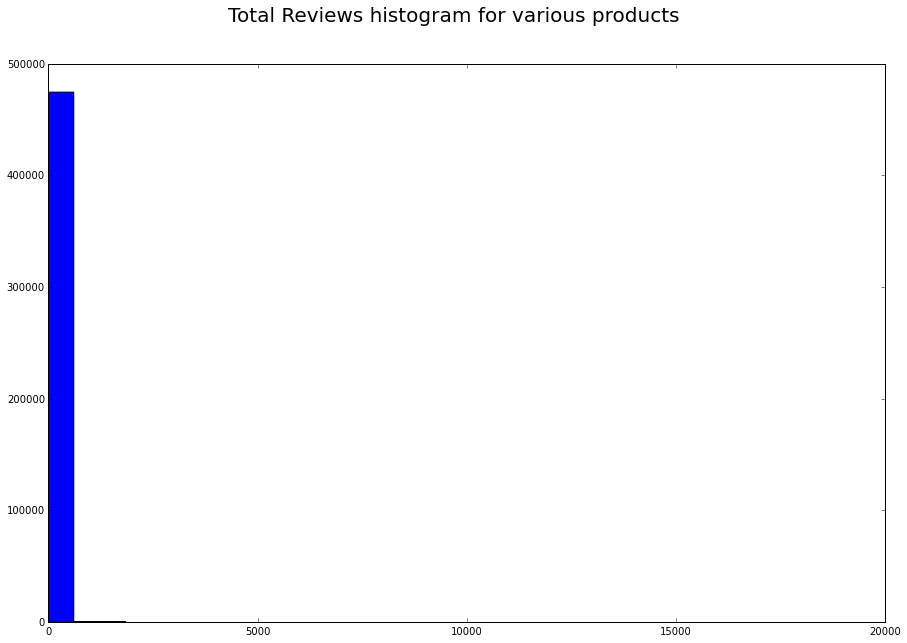

In [145]:
%matplotlib inline
import matplotlib.pyplot as plt
from pylab import *
t =product_total_rev_freq_cnt_values
width = 0.3
fig, axes = plt.subplots( nrows=1, ncols=1, figsize=(15,10) )
plt.suptitle("Total Reviews histogram for various products ", fontsize=20)
axes.hist(t,bins=30)
 

In [103]:
# product_average_rating_month.tail()
# del sketch_obj
# sketch_obj = gl.Sketch(product_average_rating_month['product id'])
# product_rev_month_cnt=gl.Sketch.frequent_items(sketch_obj)
# product_freq_cnt=gl.Sketch.frequent_items(sketch_obj)

In [128]:
import graphlab.aggregate as agg
product_rev_month_count2 = product_average_rating_month.groupby(key_columns='product id',
                        operations={'count': agg.COUNT()})
product_rev_month_count2=product_rev_month_count2.sort('count', ascending=False)
product_rev_month_count2

product id,count
B00004SB92,162
B00001P4ZH,146
B00001P4XA,142
B00007KDVI,140
B000062VUO,137
B00008SCFL,132
B00005NIMJ,131
B000065BPB,131
B000065BP9,130
B00001W0DH,127


In [129]:
# product_rev_month_cnt

In [131]:
import numpy as np
product_rev_month_cnt_values= product_rev_month_count2['count']
product_rev_month_cnt_values=np.array(product_rev_month_cnt_values)

(array([  4.14850000e+05,   3.92900000e+04,   1.28840000e+04,
          5.14900000e+03,   2.19700000e+03,   8.86000000e+02,
          3.90000000e+02,   1.95000000e+02,   8.30000000e+01,
          5.70000000e+01,   1.70000000e+01,   4.00000000e+00,
          2.00000000e+00]),
 array([  0.,   1.,   2.,   3.,   4.,   5.,   6.,   7.,   8.,   9.,  10.,
         11.,  12.,  13.]),
 <a list of 13 Patch objects>)

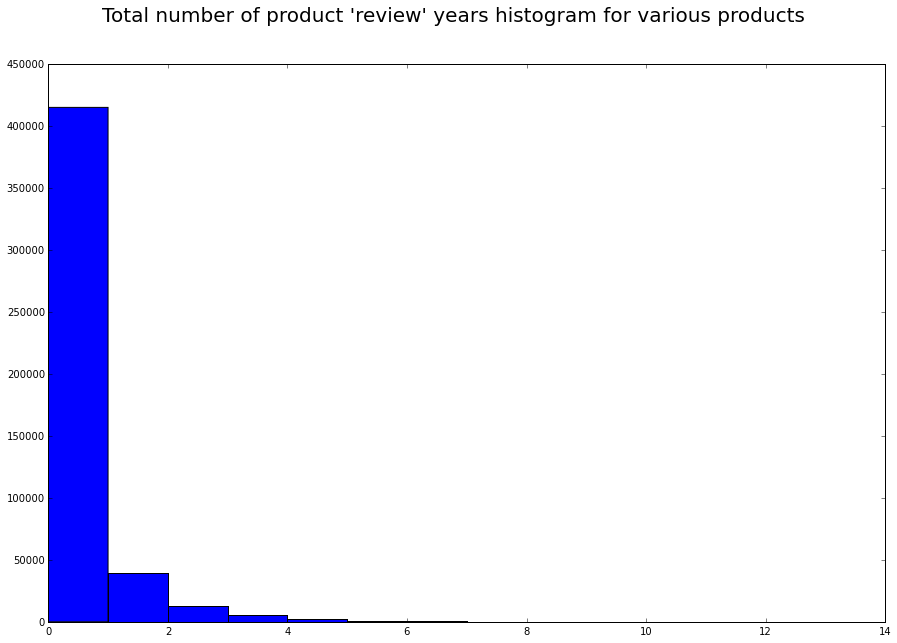

In [132]:
# del t
t=product_rev_month_cnt_values
t =np.ceil(t/12)
width = 0.3
fig, axes = plt.subplots( nrows=1, ncols=1, figsize=(15,10) )
plt.suptitle("Total number of product 'review' years histogram for various products ", fontsize=20)
axes.hist(t,bins=13)

(array([  3.33699000e+05,   5.88200000e+04,   2.79090000e+04,
          1.66510000e+04,   1.10260000e+04,   7.62500000e+03,
          5.32400000e+03,   3.70300000e+03,   2.90800000e+03,
          2.03100000e+03,   1.53500000e+03,   1.18700000e+03,
          8.73000000e+02,   5.20000000e+02,   5.59000000e+02,
          3.86000000e+02,   2.67000000e+02,   2.33000000e+02,
          1.66000000e+02,   1.26000000e+02,   9.80000000e+01,
          7.70000000e+01,   6.40000000e+01,   5.40000000e+01,
          3.20000000e+01,   3.10000000e+01,   2.00000000e+01,
          2.20000000e+01,   1.70000000e+01,   1.70000000e+01,
          4.00000000e+00,   8.00000000e+00,   4.00000000e+00,
          3.00000000e+00,   1.00000000e+00,   2.00000000e+00,
          1.00000000e+00,   0.00000000e+00,   0.00000000e+00,
          0.00000000e+00,   1.00000000e+00]),
 array([   1.        ,    4.92682927,    8.85365854,   12.7804878 ,
          16.70731707,   20.63414634,   24.56097561,   28.48780488,
          32

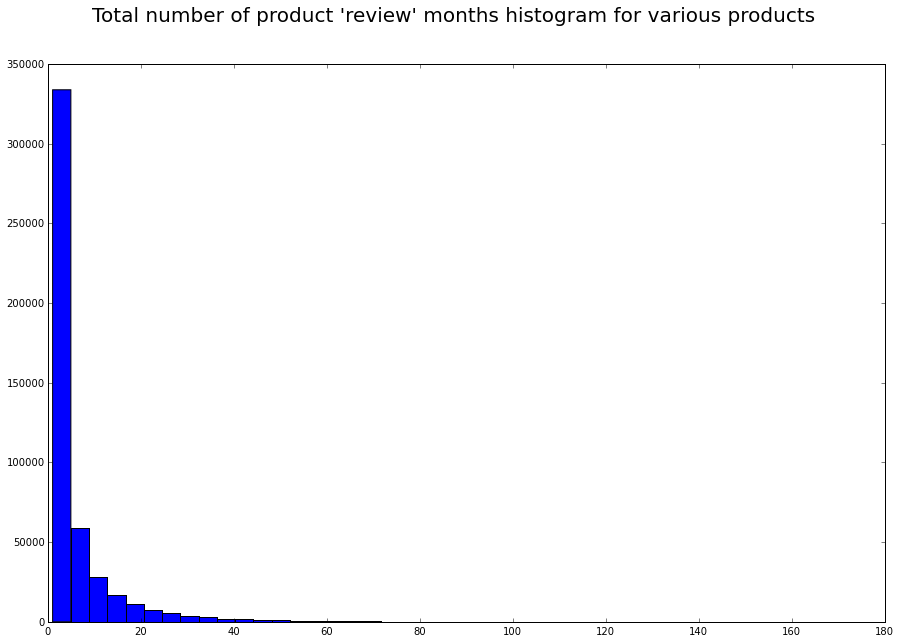

In [133]:
t=product_rev_month_cnt_values
width = 0.3
fig, axes = plt.subplots( nrows=1, ncols=1, figsize=(15,10) )
plt.suptitle("Total number of product 'review' months histogram for various products ", fontsize=20)
axes.hist(t,bins=41)

In [146]:
# product_rev_month_cnt_sorted = sorted(product_rev_month_cnt.items(), key=operator.itemgetter(1),reverse = True)
# # type(product_rev_month_cnt)
# product_rev_month_cnt_sorted

In [111]:
# idx=elec_meta_data['asin']=='B0074BW614'

In [147]:
# elec_meta_data[idx]

In [149]:
elec_rev_data_B0074BW614= elec_rev_data[elec_rev_data['product id']=='B0074BW614']

In [151]:
len(elec_rev_data_B0074BW614)

18245

In [152]:
elec_rev_data_B0074BW614.head()

product id,helpful,rating,reviewText,reviewTime,reviewerID,reviewerName
B0074BW614,"[0, 0]",4.0,good,"07 15, 2014",A3501BQE45OX22,None
B0074BW614,"[0, 0]",5.0,I had been wanting to geta kindle fire for some ...,"06 20, 2013",A2JOZUUH1FKZA5,None
B0074BW614,"[0, 0]",5.0,I love my kindle,"07 18, 2014",A2SMTNHD4IY85U,None
B0074BW614,"[0, 0]",5.0,It came just in Tim and Iam very happy ...,"07 15, 2014",A3HJD8GP1IAE7Y,None
B0074BW614,"[0, 0]",4.0,This is my third kindleand my second fire HD ...,"07 15, 2014",AS1Y9OT3RCV86,None
B0074BW614,"[0, 1]",5.0,"After her Nook tabletdied, my 11-year-old ...","08 19, 2013",A31TEWSLVFR4K,None
B0074BW614,"[0, 1]",2.0,"Amazon has sent us 3Kindle Fires now, so I ...","10 22, 2013",A15J6L46AUJOZX,None
B0074BW614,"[0, 1]",3.0,As an reader this is agreat device. It had ...,"12 16, 2012",A3QJFHH8IA2JBZ,None
B0074BW614,"[0, 1]",5.0,Bought it for my husbandwho is handicapped an ...,"06 26, 2014",A3GYYZ1RIKYB8A,None
B0074BW614,"[0, 1]",3.0,Cannot take picturesunless it is a ...,"12 29, 2013",AC8TUL2N6M4EP,None


In [153]:
#we do it only once
# elec_rev_data_B0074BW614.save('./elec_rev_data_B0074BW614')

In [157]:
# del elec_rev_data_B0074BW614
elec_rev_data_firetablet = gl.load_sframe('./elec_rev_data_B0074BW614')

In [159]:
elec_rev_data_firetablet.head()

product id,helpful,rating,reviewText,reviewTime,reviewerID,reviewerName
B0074BW614,"[0, 0]",4.0,good,"07 15, 2014",A3501BQE45OX22,None
B0074BW614,"[0, 0]",5.0,I had been wanting to geta kindle fire for some ...,"06 20, 2013",A2JOZUUH1FKZA5,None
B0074BW614,"[0, 0]",5.0,I love my kindle,"07 18, 2014",A2SMTNHD4IY85U,None
B0074BW614,"[0, 0]",5.0,It came just in Tim and Iam very happy ...,"07 15, 2014",A3HJD8GP1IAE7Y,None
B0074BW614,"[0, 0]",4.0,This is my third kindleand my second fire HD ...,"07 15, 2014",AS1Y9OT3RCV86,None
B0074BW614,"[0, 1]",5.0,"After her Nook tabletdied, my 11-year-old ...","08 19, 2013",A31TEWSLVFR4K,None
B0074BW614,"[0, 1]",2.0,"Amazon has sent us 3Kindle Fires now, so I ...","10 22, 2013",A15J6L46AUJOZX,None
B0074BW614,"[0, 1]",3.0,As an reader this is agreat device. It had ...,"12 16, 2012",A3QJFHH8IA2JBZ,None
B0074BW614,"[0, 1]",5.0,Bought it for my husbandwho is handicapped an ...,"06 26, 2014",A3GYYZ1RIKYB8A,None
B0074BW614,"[0, 1]",3.0,Cannot take picturesunless it is a ...,"12 29, 2013",AC8TUL2N6M4EP,None
